# 4.7.5 라쏘(Lasso) 모델

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('2017DC1-all.csv')   
df.shape

(20495, 31)

In [2]:
# 참조 코딩
df.head(3)

,ACCESS,ACR,AGEP,BATH,BDSP,BLD,COW,ELEP,FESRP,FKITP,...,R18,R65,RAC1P,RMSP,RWAT,SCH,SCHL,SEX,VALP,VALP_B1
0,1.0,1.0,74,1.0,3.0,2.0,0,140.0,0,0.0,...,0.0,1.0,1,5.0,1.0,1,21,2,200000.0,1.0
1,1.0,3.0,46,1.0,3.0,2.0,1,280.0,0,0.0,...,0.0,0.0,1,6.0,1.0,1,16,2,850000.0,1.0
2,1.0,3.0,45,1.0,3.0,2.0,1,280.0,0,0.0,...,0.0,0.0,1,6.0,1.0,1,16,1,850000.0,1.0


In [3]:
# 참조 코딩
# 결측값이 있는 컬럼명(변수명) 찾기
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [4]:
# 참조 코딩
df.dtypes

ACCESS     float64
ACR        float64
AGEP         int64
BATH       float64
BDSP       float64
BLD        float64
COW          int64
ELEP       float64
FESRP        int64
FKITP      float64
FPARC        int64
FSCHP        int64
FTAXP      float64
GASP       float64
HHL        float64
HHT        float64
HINCP      float64
LANX         int64
MAR          int64
MV         float64
NRC        float64
R18        float64
R65        float64
RAC1P        int64
RMSP       float64
RWAT       float64
SCH          int64
SCHL         int64
SEX          int64
VALP       float64
VALP_B1    float64
dtype: object

In [ ]:
### *** Regression 기반의 모형 (Logistic Regresssion, LAR, LASSO 등 포함)은
### *** 카테고리 변수를 모두 dummy 변수로 바꾸어야 하며 그래야 Odds ratio가 제대로 구해짐에 유의

In [2]:
cols=['AGEP', 'BDSP', 'ELEP', 'GASP', 'HINCP', 'NRC', 'RMSP', 'VALP', 'VALP_B1']
df_cat = df.drop(cols, axis=1)  # 데이터프레임에서 7개 구간 변수 및 2개의 타겟변수 제외
df_cat.shape

(20495, 22)

In [3]:
# 데이터프레임의 행과 열 전체를 보이게 하는 조치(필요시)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df_cat.describe()

,ACCESS,ACR,BATH,BLD,COW,FESRP,FKITP,FPARC,FSCHP,FTAXP,HHL,HHT,LANX,MAR,MV,R18,R65,RAC1P,RWAT,SCH,SCHL,SEX
count,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00,20495.00
mean,1.28,1.47,1.00,2.01,1.34,0.06,0.01,2.62,0.06,0.21,1.19,1.82,1.83,2.59,4.47,0.47,0.44,2.06,1.00,1.21,15.45,1.51
std,0.67,0.70,0.03,0.10,1.92,0.24,0.10,1.39,0.23,0.41,0.65,1.52,0.49,1.80,1.66,0.50,0.73,2.37,0.04,0.52,5.99,0.50
min,1.00,1.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
25%,1.00,1.00,1.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,1.00,2.00,1.00,3.00,0.00,0.00,1.00,1.00,1.00,13.00,1.00
50%,1.00,1.00,1.00,2.00,1.00,0.00,0.00,3.00,0.00,0.00,1.00,1.00,2.00,1.00,5.00,0.00,0.00,1.00,1.00,1.00,16.00,2.00
75%,1.00,2.00,1.00,2.00,1.00,0.00,0.00,4.00,0.00,0.00,1.00,2.00,2.00,5.00,6.00,1.00,1.00,1.00,1.00,1.00,20.00,2.00
max,3.00,3.00,2.00,3.00,9.00,1.00,1.00,4.00,1.00,1.00,5.00,7.00,2.00,5.00,7.00,1.00,2.00,9.00,2.00,3.00,24.00,2.00


In [62]:
df_cat.max() - df_cat.min()

ACCESS    2.00
ACR       2.00
BATH      1.00
BLD       1.00
COW       9.00
FESRP     1.00
FKITP     1.00
FPARC     4.00
FSCHP     1.00
FTAXP     1.00
HHL       4.00
HHT       6.00
LANX      2.00
MAR       4.00
MV        6.00
R18       1.00
R65       2.00
RAC1P     8.00
RWAT      1.00
SCH       3.00
SCHL     24.00
SEX       1.00
dtype: float64

In [5]:
df_cat.min()

ACCESS    1.0
ACR       1.0
BATH      1.0
BLD       2.0
COW       0.0
FESRP     0.0
FKITP     0.0
FPARC     0.0
FSCHP     0.0
FTAXP     0.0
HHL       1.0
HHT       1.0
LANX      0.0
MAR       1.0
MV        1.0
R18       0.0
R65       0.0
RAC1P     1.0
RWAT      1.0
SCH       0.0
SCHL      0.0
SEX       1.0
dtype: float64

In [6]:
df['RWAT'].value_counts(dropna=False)

1.00    20460
2.00       35
Name: RWAT, dtype: int64

In [7]:
df['RWAT'] = df['RWAT'].replace(2,0)

In [8]:
df['RWAT'].value_counts(dropna=False)

1.00    20460
0.00       35
Name: RWAT, dtype: int64

In [9]:
# 22개 범주형 변수중에서 값으로 0과 1만 가지는 (이미 더미 변수화 되어 있는) 7개 변수명을 제외하고서 cols1에 저장

cols1 = ['ACCESS','ACR','BLD','COW','FPARC','HHL','HHT','LANX','MAR','MV','R65','RAC1P',
         'SCH','SCHL','SEX']

In [10]:
df1 = pd.get_dummies(df, columns=cols1)   # cols1에 담긴 변수들의 더미변수를 생성 
                                          # 이 명령은 더미변수를 생성한 원본변수는 제거함에 유의

In [11]:
df1.head(3)

,AGEP,BATH,BDSP,ELEP,FESRP,FKITP,FSCHP,FTAXP,GASP,HINCP,NRC,R18,RMSP,RWAT,VALP,VALP_B1,ACCESS_1.0,ACCESS_2.0,ACCESS_3.0,ACR_1.0,ACR_2.0,ACR_3.0,BLD_2.0,BLD_3.0,COW_0,COW_1,COW_2,COW_3,COW_4,COW_5,COW_6,COW_7,COW_8,COW_9,FPARC_0,FPARC_1,FPARC_2,FPARC_3,FPARC_4,HHL_1.0,HHL_2.0,HHL_3.0,HHL_4.0,HHL_5.0,HHT_1.0,HHT_2.0,HHT_3.0,HHT_4.0,HHT_5.0,HHT_6.0,HHT_7.0,LANX_0,LANX_1,LANX_2,MAR_1,MAR_2,MAR_3,MAR_4,MAR_5,MV_1.0,MV_2.0,MV_3.0,MV_4.0,MV_5.0,MV_6.0,MV_7.0,R65_0.0,R65_1.0,R65_2.0,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,SCH_0,SCH_1,SCH_2,SCH_3,SCHL_0,SCHL_1,SCHL_2,SCHL_3,SCHL_4,SCHL_5,SCHL_6,SCHL_7,SCHL_8,SCHL_9,SCHL_10,SCHL_11,SCHL_12,SCHL_13,SCHL_14,SCHL_15,SCHL_16,SCHL_17,SCHL_18,SCHL_19,SCHL_20,SCHL_21,SCHL_22,SCHL_23,SCHL_24,SEX_1,SEX_2
0,74,1.00,3.00,140.00,0,0.00,0,0.00,50.00,33400.00,0.00,0.00,5.00,1.00,200000.00,1.00,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,46,1.00,3.00,280.00,0,0.00,0,0.00,3.00,105000.00,0.00,0.00,6.00,1.00,850000.00,1.00,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,45,1.00,3.00,280.00,0,0.00,0,0.00,3.00,105000.00,0.00,0.00,6.00,1.00,850000.00,1.00,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [68]:
df1.shape

(20495, 109)

In [17]:
# 참조 코딩
list(df1.columns)

['AGEP',
 'BATH',
 'BDSP',
 'ELEP',
 'FESRP',
 'FKITP',
 'FSCHP',
 'FTAXP',
 'GASP',
 'HINCP',
 'NRC',
 'R18',
 'RMSP',
 'RWAT',
 'VALP',
 'VALP_B1',
 'ACCESS_1.0',
 'ACCESS_2.0',
 'ACR_1.0',
 'ACR_2.0',
 'BLD_2.0',
 'COW_0',
 'COW_1',
 'COW_2',
 'COW_3',
 'COW_4',
 'COW_5',
 'COW_6',
 'COW_7',
 'COW_8',
 'FPARC_0',
 'FPARC_1',
 'FPARC_2',
 'FPARC_3',
 'HHL_1.0',
 'HHL_2.0',
 'HHL_3.0',
 'HHL_4.0',
 'HHT_1.0',
 'HHT_2.0',
 'HHT_3.0',
 'HHT_4.0',
 'HHT_5.0',
 'HHT_6.0',
 'LANX_0',
 'LANX_1',
 'MAR_1',
 'MAR_2',
 'MAR_3',
 'MAR_4',
 'MV_1.0',
 'MV_2.0',
 'MV_3.0',
 'MV_4.0',
 'MV_5.0',
 'MV_6.0',
 'R65_1.0',
 'R65_2.0',
 'RAC1P_1',
 'RAC1P_2',
 'RAC1P_3',
 'RAC1P_4',
 'RAC1P_5',
 'RAC1P_6',
 'RAC1P_7',
 'RAC1P_9',
 'SCH_0',
 'SCH_2',
 'SCH_3',
 'SCHL_0',
 'SCHL_2',
 'SCHL_3',
 'SCHL_4',
 'SCHL_5',
 'SCHL_6',
 'SCHL_7',
 'SCHL_8',
 'SCHL_9',
 'SCHL_10',
 'SCHL_11',
 'SCHL_12',
 'SCHL_13',
 'SCHL_14',
 'SCHL_15',
 'SCHL_16',
 'SCHL_17',
 'SCHL_18',
 'SCHL_19',
 'SCHL_20',
 'SCHL_21',
 'SCH

In [12]:
# 기준 더미 변수(base dummy variable)로 정한 15개 더미 변수명을 cols2에 저장
cols2 = ['ACCESS_3.0','ACR_3.0','BLD_3.0','COW_9','FPARC_4','HHL_5.0','HHT_7.0','LANX_2',
         'MAR_5','MV_7.0','R65_0.0','RAC1P_8','SCH_1','SCHL_1','SEX_1']

df1.drop(cols2, axis=1, inplace=True)   # cols2에 저장된 15개 더미 변수명을 데이터프레임에서 제거
df1.shape

(20495, 94)

In [13]:
# 더미 변수까지만 처리하고 변수의 스케일 조정을 하지 않은 데이터프레임 df1에서 
# 연속형 타겟변수 VALP를 데이터프레임에서 제거하고 이진값 타겟변수 VALP_B1은 남김
df1_VALP_B1 = df1.drop('VALP', axis=1)   
df1_VALP_B1.shape

(20495, 93)

In [14]:
# 더미 변수까지만 처리하고 변수의 스케일 조정을 하지 않은 데이터프레임 df1에서 
# 이진값 타겟변수 VALP_B1을 데이터프레임에서 제거하고 연속형 타겟변수 VALP는 남김
df1_VALP = df1.drop('VALP_B1', axis=1)   
df1_VALP.shape

(20495, 93)

In [16]:
df1_VALP_B1.to_csv('house-unscaled.csv', index=False)
df1_VALP.to_csv('house-unscaled-VALP.csv', index=False)

# 스케일 표준화(StandardScaler) 파일 생성 및 저장

In [19]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만들며 연속형 타겟변수 VALP도 포함
numeric_cols = ['AGEP', 'BDSP', 'ELEP', 'GASP', 'HINCP', 'NRC', 'RMSP', 'VALP']
df_num = df1[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임 형태로 저장
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 삭제하기 때문에, 새로 만든 데이터프레임에 다시 변수명을 입력
df_num_standard.columns = df_num.columns
df_num_standard.head()

,AGEP,BDSP,ELEP,GASP,HINCP,NRC,RMSP,VALP
0,1.28,-0.19,-0.22,-0.03,-0.86,-0.76,-0.78,0.40
1,0.12,-0.19,1.55,-1.03,0.54,-0.76,-0.26,6.19
2,0.07,-0.19,1.55,-1.03,0.54,-0.76,-0.26,6.19
3,0.95,-0.19,-0.98,-0.24,-0.56,-0.76,-0.26,-0.58
4,0.99,-0.19,0.29,2.09,0.05,-0.76,0.26,-0.04


In [20]:
df_cat = df1.drop(numeric_cols, axis=1) # 데이터프레임 df1에서 구간변수들을 제거하여 df_num에 저장
df_cat.columns                          # df_cat의 변수명을 나열(이진값 타겟변수 VALP_B1 포함)

Index(['BATH', 'FESRP', 'FKITP', 'FSCHP', 'FTAXP', 'R18', 'RWAT', 'VALP_B1',
       'ACCESS_1.0', 'ACCESS_2.0', 'ACR_1.0', 'ACR_2.0', 'BLD_2.0', 'COW_0',
       'COW_1', 'COW_2', 'COW_3', 'COW_4', 'COW_5', 'COW_6', 'COW_7', 'COW_8',
       'FPARC_0', 'FPARC_1', 'FPARC_2', 'FPARC_3', 'HHL_1.0', 'HHL_2.0',
       'HHL_3.0', 'HHL_4.0', 'HHT_1.0', 'HHT_2.0', 'HHT_3.0', 'HHT_4.0',
       'HHT_5.0', 'HHT_6.0', 'LANX_0', 'LANX_1', 'MAR_1', 'MAR_2', 'MAR_3',
       'MAR_4', 'MV_1.0', 'MV_2.0', 'MV_3.0', 'MV_4.0', 'MV_5.0', 'MV_6.0',
       'R65_1.0', 'R65_2.0', 'RAC1P_1', 'RAC1P_2', 'RAC1P_3', 'RAC1P_4',
       'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_9', 'SCH_0', 'SCH_2', 'SCH_3',
       'SCHL_0', 'SCHL_2', 'SCHL_3', 'SCHL_4', 'SCHL_5', 'SCHL_6', 'SCHL_7',
       'SCHL_8', 'SCHL_9', 'SCHL_10', 'SCHL_11', 'SCHL_12', 'SCHL_13',
       'SCHL_14', 'SCHL_15', 'SCHL_16', 'SCHL_17', 'SCHL_18', 'SCHL_19',
       'SCHL_20', 'SCHL_21', 'SCHL_22', 'SCHL_23', 'SCHL_24', 'SEX_2'],
      dtype='object')

In [21]:
# 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 모아 둔 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명을 나열

Index(['AGEP', 'BDSP', 'ELEP', 'GASP', 'HINCP', 'NRC', 'RMSP', 'VALP', 'BATH',
       'FESRP', 'FKITP', 'FSCHP', 'FTAXP', 'R18', 'RWAT', 'VALP_B1',
       'ACCESS_1.0', 'ACCESS_2.0', 'ACR_1.0', 'ACR_2.0', 'BLD_2.0', 'COW_0',
       'COW_1', 'COW_2', 'COW_3', 'COW_4', 'COW_5', 'COW_6', 'COW_7', 'COW_8',
       'FPARC_0', 'FPARC_1', 'FPARC_2', 'FPARC_3', 'HHL_1.0', 'HHL_2.0',
       'HHL_3.0', 'HHL_4.0', 'HHT_1.0', 'HHT_2.0', 'HHT_3.0', 'HHT_4.0',
       'HHT_5.0', 'HHT_6.0', 'LANX_0', 'LANX_1', 'MAR_1', 'MAR_2', 'MAR_3',
       'MAR_4', 'MV_1.0', 'MV_2.0', 'MV_3.0', 'MV_4.0', 'MV_5.0', 'MV_6.0',
       'R65_1.0', 'R65_2.0', 'RAC1P_1', 'RAC1P_2', 'RAC1P_3', 'RAC1P_4',
       'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_9', 'SCH_0', 'SCH_2', 'SCH_3',
       'SCHL_0', 'SCHL_2', 'SCHL_3', 'SCHL_4', 'SCHL_5', 'SCHL_6', 'SCHL_7',
       'SCHL_8', 'SCHL_9', 'SCHL_10', 'SCHL_11', 'SCHL_12', 'SCHL_13',
       'SCHL_14', 'SCHL_15', 'SCHL_16', 'SCHL_17', 'SCHL_18', 'SCHL_19',
       'SCHL_20', 'SCHL_21

In [22]:
dfu_standard.shape

(20495, 94)

In [23]:
# 연속형 타겟변수 VALP를 데이터프레임에서 제거하고 이진값 타겟변수 VALP_B1은 남김
dfu_standard_VALP_B1 = dfu_standard.drop('VALP', axis=1)   
dfu_standard_VALP_B1.shape

(20495, 93)

In [24]:
# 이진값 타겟변수 VALP_B1을 데이터프레임에서 제거하고 연속형 타겟변수 VALP는 남김
dfu_standard_VALP = dfu_standard.drop('VALP_B1', axis=1)   
dfu_standard_VALP.shape

(20495, 93)

In [25]:
# 데이터프레임을 csv 형태로 저장
dfu_standard_VALP_B1.to_csv('house-standard.csv', index=False)  
dfu_standard_VALP.to_csv('house-standard-VALP.csv', index=False) 

# 스케일 로그 변환 파일 생성 및 저장

In [ ]:
# StandardScaler( )에 의한 표준화하지 않은 데이터프레임인 df1을 사용한다는데 주의!

In [29]:
col_money = ['ELEP', 'GASP', 'HINCP','VALP'] # 달러 표시 변수들 
df1[col_money].max()

ELEP       490.00
GASP       290.00
HINCP   319000.00
VALP    855000.00
dtype: float64

In [30]:
df_money_log = df1[col_money].transform(lambda x: np.log(x+1))   # 데이터프레임에 로그 변환 적용 
df_money_log.describe()

,ELEP,GASP,HINCP,VALP
count,20495.00,20495.00,20495.00,20495.00
mean,4.92,3.34,10.95,11.69
std,0.62,1.32,1.13,0.80
min,0.69,0.69,0.00,6.91
25%,4.62,1.39,10.59,11.29
50%,4.95,3.93,11.13,11.78
75%,5.30,4.26,11.56,12.21
max,6.20,5.67,12.67,13.66


In [ ]:
# 주피터 노트북 버전마다 seaborn 버전이 달라서 histplot이 작동 안할 때 다음과 같이 업데이팅!
!pip install -U seaborn

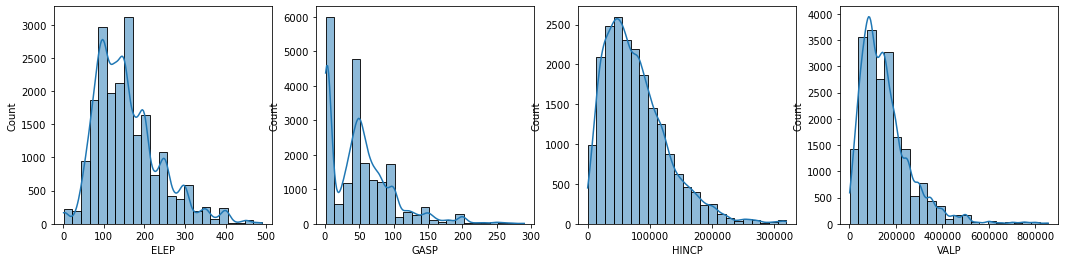

In [31]:
# 로그 변환전 달러 표시 변수의 히스토그램
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df1, x="ELEP", kde=True, bins=23)
sns.histplot(ax=axes[1], data=df1, x="GASP", kde=True, bins=23)
sns.histplot(ax=axes[2], data=df1, x="HINCP", kde=True, bins=23)
sns.histplot(ax=axes[3], data=df1, x="VALP", kde=True, bins=23);

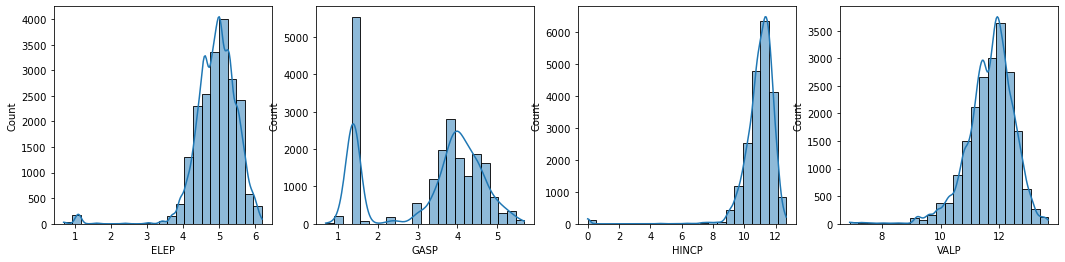

In [32]:
# 로그 변환후 달러 표시 변수의 히스토그램
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df_money_log, x="ELEP", kde=True, bins=23)
sns.histplot(ax=axes[1], data=df_money_log, x="GASP", kde=True, bins=23)
sns.histplot(ax=axes[2], data=df_money_log, x="HINCP", kde=True, bins=23)
sns.histplot(ax=axes[3], data=df_money_log, x="VALP", kde=True, bins=23);

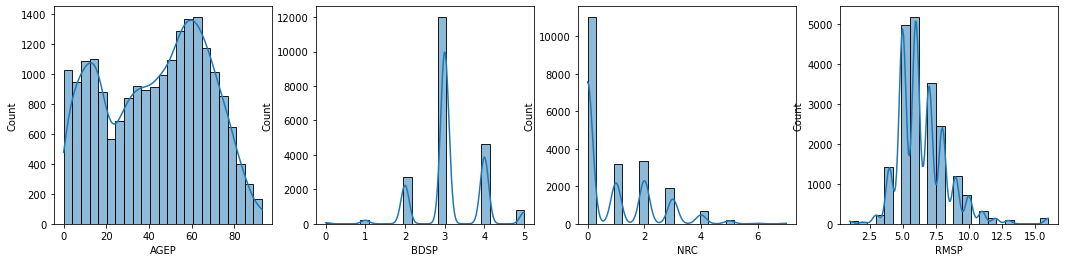

In [33]:
# 로그 변환전 나머지 4개 구간변수 히스토그램
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df1, x="AGEP", kde=True, bins=23)
sns.histplot(ax=axes[1], data=df1, x="BDSP", kde=True, bins=23)
sns.histplot(ax=axes[2], data=df1, x="NRC", kde=True, bins=23)
sns.histplot(ax=axes[3], data=df1, x="RMSP", kde=True, bins=23);

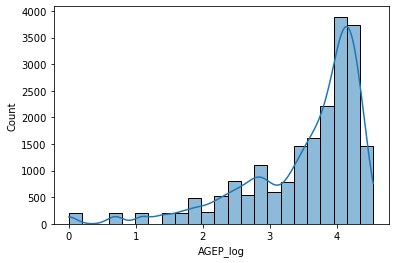

In [34]:
df1['AGEP_log']= df1['AGEP'].transform(lambda x: np.log(x+1))   # 로그 변환 적용

sns.histplot(data=df1, x="AGEP_log", kde=True, bins=23);

In [35]:
df1['AGEP10th'] = df1['AGEP']/10
df1[['AGEP','AGEP10th']].head(3)

,AGEP,AGEP10th
0,74,7.40
1,46,4.60
2,45,4.50


In [36]:
df1.drop('AGEP_log', axis=1, inplace=True)

In [37]:
# df1의 구간변수 중 달러 표기가 아닌 변수들을 df_num에 저장
# 이때 기존 구간변수 AGEP를 1/10로 스케일 조정한 AGEP10th로 대체
df_num = df1[['AGEP10th', 'BDSP', 'NRC', 'RMSP']]

In [38]:
# 달러 표기된 변수명이 df_money_log에 담겨있는지 확인
df_money_log.columns

Index(['ELEP', 'GASP', 'HINCP', 'VALP'], dtype='object')

In [39]:
# 스케일을 변경하지 않은 구간변수를 모든 df_num, 
# 스케일을 로그변환한 구간변수를 담은 df_money_log,
# 그리고 범주형 변수를 모은 df_cat을 병합
dfu_log = pd.concat([df_num, df_money_log, df_cat], axis=1)
dfu_log.shape

(20495, 94)

In [40]:
# 참조 코드
dfu_log.columns

Index(['AGEP10th', 'BDSP', 'NRC', 'RMSP', 'ELEP', 'GASP', 'HINCP', 'VALP',
       'BATH', 'FESRP', 'FKITP', 'FSCHP', 'FTAXP', 'R18', 'RWAT', 'VALP_B1',
       'ACCESS_1.0', 'ACCESS_2.0', 'ACR_1.0', 'ACR_2.0', 'BLD_2.0', 'COW_0',
       'COW_1', 'COW_2', 'COW_3', 'COW_4', 'COW_5', 'COW_6', 'COW_7', 'COW_8',
       'FPARC_0', 'FPARC_1', 'FPARC_2', 'FPARC_3', 'HHL_1.0', 'HHL_2.0',
       'HHL_3.0', 'HHL_4.0', 'HHT_1.0', 'HHT_2.0', 'HHT_3.0', 'HHT_4.0',
       'HHT_5.0', 'HHT_6.0', 'LANX_0', 'LANX_1', 'MAR_1', 'MAR_2', 'MAR_3',
       'MAR_4', 'MV_1.0', 'MV_2.0', 'MV_3.0', 'MV_4.0', 'MV_5.0', 'MV_6.0',
       'R65_1.0', 'R65_2.0', 'RAC1P_1', 'RAC1P_2', 'RAC1P_3', 'RAC1P_4',
       'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_9', 'SCH_0', 'SCH_2', 'SCH_3',
       'SCHL_0', 'SCHL_2', 'SCHL_3', 'SCHL_4', 'SCHL_5', 'SCHL_6', 'SCHL_7',
       'SCHL_8', 'SCHL_9', 'SCHL_10', 'SCHL_11', 'SCHL_12', 'SCHL_13',
       'SCHL_14', 'SCHL_15', 'SCHL_16', 'SCHL_17', 'SCHL_18', 'SCHL_19',
       'SCHL_20', 'SCH

In [41]:
# 연속형 타겟변수 VALP를 데이터프레임에서 제거하고 이진값 타겟변수 VALP_B1은 남김
dfu_log_VALP_B1 = dfu_log.drop('VALP', axis=1)   
dfu_log_VALP_B1.shape

(20495, 93)

In [42]:
# 이진값 타겟변수 VALP_B1을 데이터프레임에서 제거하고 연속형 타겟변수 VALP는 남김
dfu_log_VALP = dfu_log.drop('VALP_B1', axis=1)   
dfu_log_VALP.shape

(20495, 93)

In [43]:
dfu_log_VALP_B1.to_csv('house-log.csv', index=False)
dfu_log_VALP.to_csv('house-log-VALP.csv', index=False)